# Exersice 2 : Spatial filtering algorithm
## Shahab Esfandiar_9819373

### Import required packages

In [36]:
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
from skimage.util import random_noise

### Import data

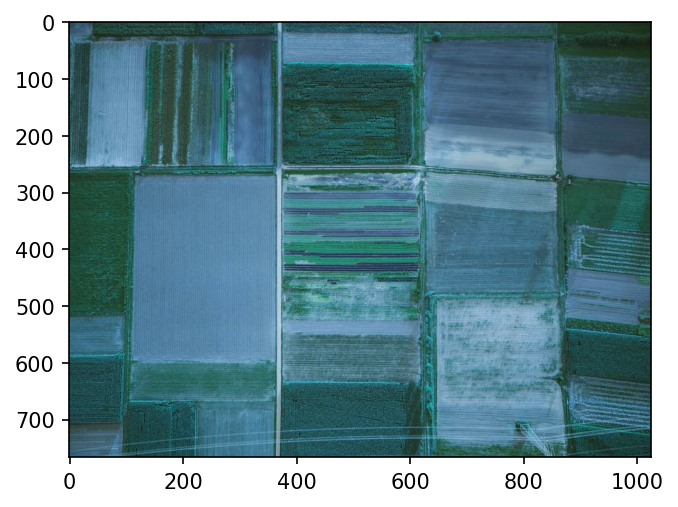

In [37]:
img = cv2.imread('SF_image.jfif')
plt.figure(figsize=(5, 5), dpi=150)
plt.imshow(img)

### Create salt & pepper noise and applying to our image

(<matplotlib.image.AxesImage at 0x1a98ce1b190>, Text(0.5, 1.0, 'noisy image'))

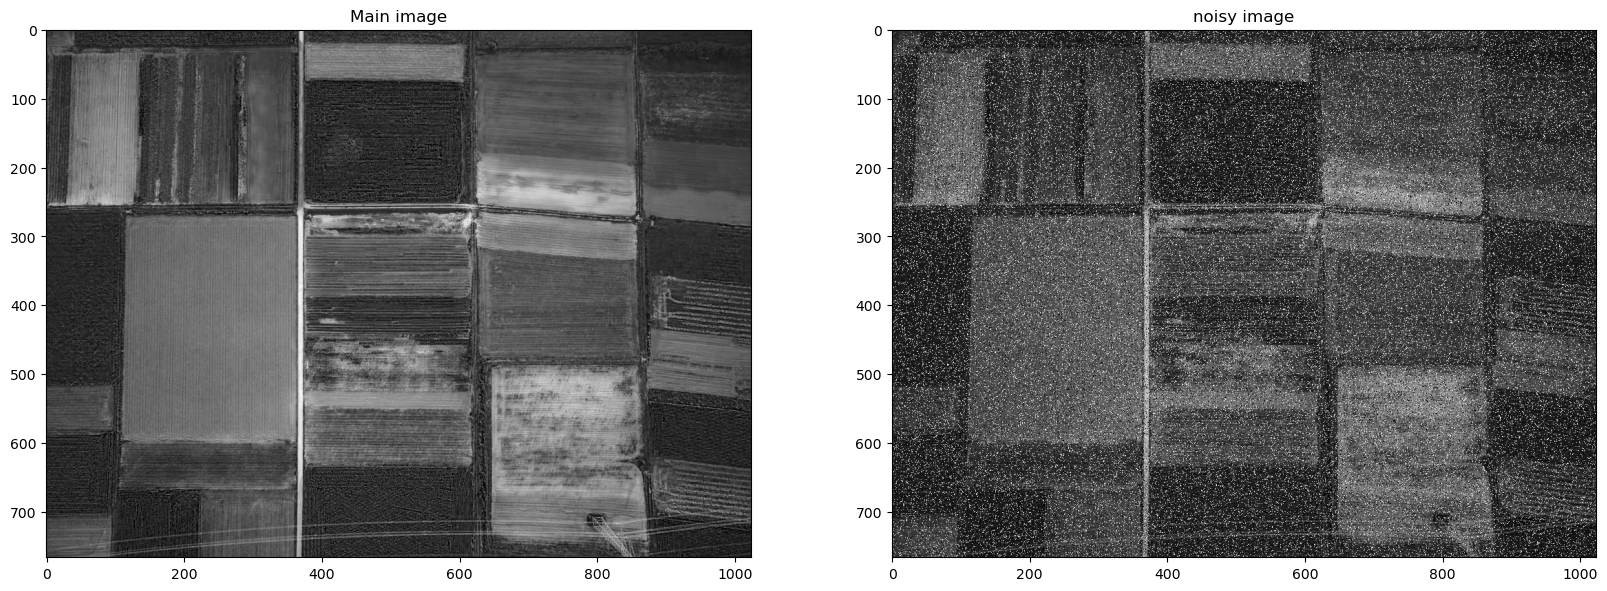

In [38]:
SPN_img = random_noise(img, mode='s&p', amount=0.15)

def SaltAndPaper(img, density):
    
    # create an empty array with same size as input image
    output = np.zeros(img.shape, np.uint8)

    # parameter for controlling how much salt and paper are added
    threshhold = 1 - density

    # loop every each pixel and decide add the noise or not base on threshhold (density)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            possibility = random.random()
            
            if possibility < density:
                output[i][j] = 0
                
            elif possibility > threshhold:
                output[i][j] = 255
                
            else:
                output[i][j] = img[i][j]
                
    return output

plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1);plt.imshow(img[:, :, 0], cmap ='gray'), plt.title('Main image')
plt.subplot(1, 2, 2);plt.imshow(SPN_img[:, :, 0], cmap ='gray'), plt.title('noisy image')

### 1) Mean filter

In [39]:
def MeanFilter(img, fs):
    
    # Create an empty filter
    Mean = np.zeros(img.shape, np.uint8)
    temp = 0
    
    # For 3x3 fliter
    if fs == 9:
        
        for i in range(1, img.shape[0]-1):
            for j in range(1, img.shape[1]-1):
                for m in range(-1, 2):
                    for n in range(-1, 2):
                        temp = temp + img[i+m, j+n]
                        
                Mean[i][j] = int(temp / fs)
                temp = 0
                
    # For 5x5 fliter
    elif fs == 25:
        
        for i in range(2, img.shape[0]-2):
            for j in range(2, img.shape[1]-2):
                for m in range(-2, 3):
                    for n in range(-2, 3):
                        temp = temp + img[i+m, j+n]
                        
                Mean[i][j] = int(temp / fs)
                temp = 0

    return Mean

### 2) Median filter

In [40]:
def MedianFilter(image, fs):
    
    # Create an empty filter
    Med = np.zeros(img.shape, np.uint8)
    
    # Create the kernel
    filter_array = [img[0][0]] * fs

    # For 3x3 fliter
    if fs == 9:
    
        for j in range(1, img.shape[0]-1):
            for i in range(1, img.shape[1]-1):
                
                filter_array[0] = img[j-1, i-1]
                filter_array[1] = img[j, i-1]
                filter_array[2] = img[j+1, i-1]
                filter_array[3] = img[j-1, i]
                filter_array[4] = img[j, i]
                filter_array[5] = img[j+1, i]
                filter_array[6] = img[j-1, i+1]
                filter_array[7] = img[j, i+1]
                filter_array[8] = img[j+1, i+1]

                filter_array.sort()

                # Put the median number into output array
                Med[j][i] = filter_array[4]
                
    # For 5x5 fliter
    if fs == 25:    
    
       for j in range(2, img.shape[0]-2):
            for i in range(2, img.shape[1]-2):
                
                filter_array[0] = img[j-2, i-2]
                filter_array[1] = img[j-1, i-2]
                filter_array[2] = img[j, i-2]
                filter_array[3] = img[j+1, i-2]
                filter_array[4] = img[j+2, i-2]
                filter_array[5] = img[j-2, i-1]
                filter_array[6] = img[j-1, i-1]
                filter_array[7] = img[j, i-1]
                filter_array[8] = img[j+1, i-1]
                filter_array[9] = img[j+2, i-1]
                filter_array[10] = img[j-2, i]
                filter_array[11] = img[j-1, i]
                filter_array[12] = img[j, i]
                filter_array[13] = img[j+1, i]
                filter_array[14] = img[j+2, i]
                filter_array[15] = img[j-2, i+1]
                filter_array[16] = img[j-1, i+1]
                filter_array[17] = img[j, i+1]
                filter_array[18] = img[j+1, i+1]
                filter_array[19] = img[j+2, i+1]
                filter_array[20] = img[j-2, i+2]
                filter_array[21] = img[j-1, i+2]
                filter_array[22] = img[j, i+2]
                filter_array[23] = img[j+1, i+2]
                filter_array[24] = img[j+2, i+2]

                filter_array.sort()

                # Put the median number into output array
                Med[j][i] = filter_array[12]
            
    return Med


### 3) Gaussian filter

In [41]:
def GaussianFilter(img):
    
    # Create an 3x3 filter
    height = img.shape[0]
    width  = img.shape[1]
    height_GF = height + 2
    width_GF  = width  + 2
    
    Gauss = np.zeros((height_GF, width_GF))
    x = (width_GF - width) // 2
    y = (height_GF - height) // 2
    Gauss[y:y + height, x:x + width] = img

    # Create the kernel
    kernel = np.array(([1,2,1]
                      ,[2,4,2]
                      ,[1,2,1]))
    
    Gauss_img = np.zeros_like(img)
    CDF = np.zeros_like(kernel)

    for i in range(y, height):
        for j in range(x, width):
            
            CDF[0,0] = Gauss[i-1, j-1] * kernel[0,0]
            CDF[0,1] = Gauss[i, j-1] * kernel[0,1]
            CDF[0,2] = Gauss[i+1, j-1] * kernel[0,2]
            CDF[1,0] = Gauss[i-1, j] * kernel[1,0]
            CDF[1,1] = Gauss[i, j] * kernel[1,1]
            CDF[1,2] = Gauss[i+1, j] * kernel[1,2]
            CDF[2,0] = Gauss[i-1, j+1] * kernel[2,0]
            CDF[2,1] = Gauss[i, j+1] * kernel[2,1]
            CDF[2,2] = Gauss[i+1, j+1] * kernel[2,2]
            
            # Applied Gaussian filter
            Gauss_img[i, j] = np.sum(CDF) / 16
            
    return Gauss_img

### Apply filteres on our image

In [44]:
img = cv2.imread('SF_image.jfif', 0)
SPN_img = SaltAndPaper(img, 0.01)

Mean_img = MeanFilter(SPN_img, 9)
Med_img = MedianFilter(SPN_img, 9)
Gauss_img = GaussianFilter(SPN_img)

### Plot results

(<matplotlib.image.AxesImage at 0x1a998d361f0>,
 Text(0.5, 1.0, 'Med filtered image'))

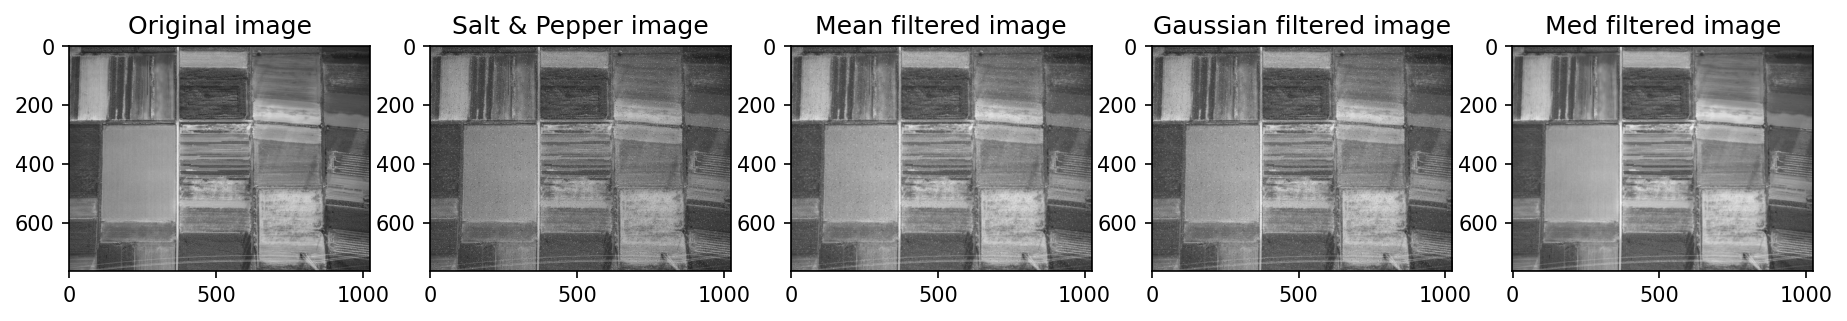

In [53]:
plt.figure(figsize=(15, 10), dpi=150)
plt.subplot(1, 5, 1);plt.imshow(img, cmap ='gray'), plt.title('Original image')
plt.subplot(1, 5, 2);plt.imshow(SPN_img, cmap ='gray'), plt.title('Salt & Pepper image')
plt.subplot(1, 5, 3);plt.imshow(Mean_img, cmap ='gray'), plt.title('Mean filtered image')
plt.subplot(1, 5, 4);plt.imshow(Gauss_img, cmap ='gray'), plt.title('Gaussian filtered image')
plt.subplot(1, 5, 5);plt.imshow(Med_img, cmap ='gray'), plt.title('Med filtered image')

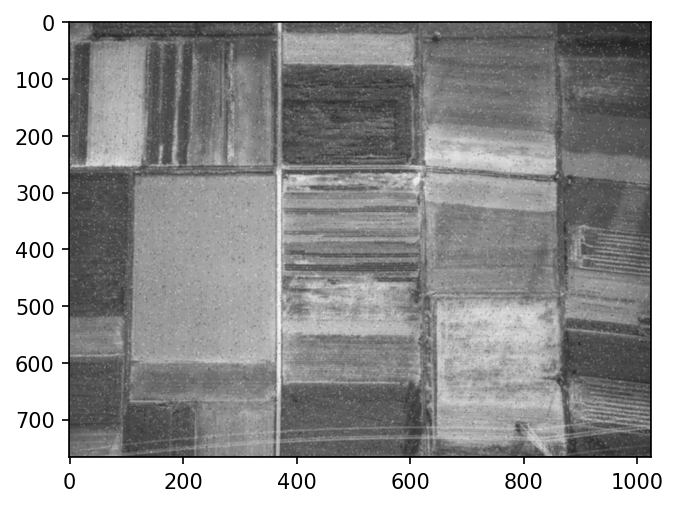

In [55]:
plt.figure(figsize=(5, 5), dpi=150)
plt.imshow(Mean_img, cmap ='gray')

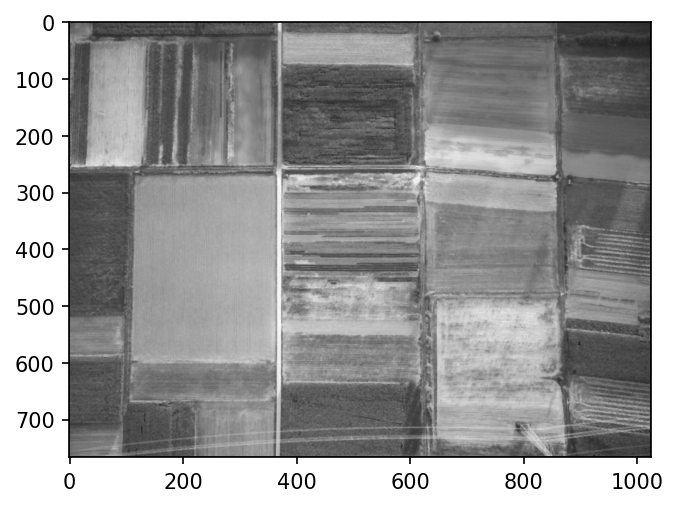

In [56]:
plt.figure(figsize=(5, 5), dpi=150)
plt.imshow(Med_img, cmap ='gray')

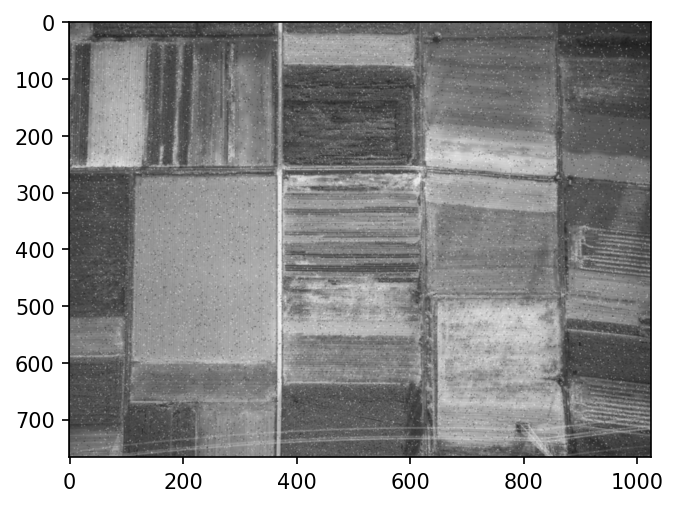

In [57]:
plt.figure(figsize=(5, 5), dpi=150)
plt.imshow(Gauss_img, cmap ='gray')